# Анализ данных для сервиса аренды самокатов GoFast

## Цели работы

Анализ данных и проверка гипотез, которые могут помочь бизнесу вырасти.

## Описание данных

Имеются три датафрейма: <br>
1. `users_go.csv` - информация о пользователях из нескольких городов;
2. `rides_go.csv` - информация о поездках;
3. `subscriptions_go.csv` - информация о подписках.

Столбы в таблице *users_go.csv*:
1. `user_id` - уникальный номер пользователя;
2. `name` - имя пользователя;
3. `age` - возраст;
4. `city` - город пользователя;
5. `subscription_type` - тип подписки.

Есть два значения в столце subscription_type:
1. `free` 
* *без подписки*
* абонентская плата отсутствует;
* стоимость одной минуты поездки — 8 рублей;
* стоимость старта (начала поездки) — 50 рублей;

2. `ultra`

* *с подпиской Ultra*
* абонентская плата — 199 рублей в месяц;
* стоимость одной минуты поездки — 6 рублей;
* стоимость старта — бесплатно.

Столбы в таблице *rides_go.csv*:
1. `user_id` - уникальный номер пользователя;
2. `distance` - дистанция данной поездки в метрах;
3. `duration` - длительность поездки в минутах;
4. `date` - дата поездки.

Столбы в таблице *subscriptions_go.csv*:
1. `subscription_type` - тип подписки;
2. `minute_price` - стоимость одной минуты поездки;
3. `start_ride_price` - стоимость старта (начала поездки);
4. `subscription_fee` -абонентская плата  в месяц.


## План работ

### Шаг 1. Знакомство с данными.

<b>1.1.</b> Считаем CSV-файлы с данными с помощью библиотеки Pandas и сохраним их в датафреймы. Пути к файлам: <br>
/datasets/users_go.csv<br>
/datasets/rides_go.csv<br>
/datasets/subscriptions_go.csv<br>
<b>1.2.</b> Выведем первые строки каждого набора данных. Изучим общую информацию о каждом датафрейме.

### Шаг 2. Предобработка данных

**2.1** Приведем столбец date к типу даты Pandas. <br>
**2.2** Создадим новый столбец с номером месяца на основе столбца date.<br>
**2.3** Проверим наличие пропущенных значений и дубликатов в датафреймах. Обработаем их, если такие значения присутствуют.

### Шаг 3. Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках:<br>
**3.1** частота встречаемости городов <br>
**3.2** соотношение пользователей с подпиской и без подписки<br>
**3.3** возраст пользователей<br>
**3.4** расстояние, которое пользователь преодолел за одну поездку<br>
**3.5** продолжительность поездок.

### Шаг 4. Объединение данных

**4.1** Объединим данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().<br>
**4.2** Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1:<br>
c данными о пользователях без подписки;<br>
с данными о пользователях с подпиской.<br>
**4.3** Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.<br>

### Шаг 5. Подсчёт выручки

**5.1** Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. <br>
**5.2** В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь — обратимся к информации об условиях оплаты для подписчиков и и тех, у кого нет подписки. Минуты при подсчёте стоимости округлим до ближайшего целого числа. <br>

### Шаг 6. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.<br>
**6.1**  Важно понять, тратят ли пользователи с подпиской больше времени на поездки?  Проверим гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.<br>
**6.2** Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, меньше 3130 метров? Проверим гипотезу и сделаем выводы.<br>
**6.3** Проверим гипотезу о том, будет ли выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.<br>
**6.4** Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное <br>приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест нам понадобился бы для проверки этой гипотезы?

### Шаг 7. Распределения

**7.1** Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соотвествующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10% пользователей. Выясним, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%. Подберем параметры распределения, описывающего эту ситуацию, построим график распределения и сформулируем ответ на вопрос о количестве промокодов. <br>
**7.2** Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40% получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации построим примерный график распределения и оценим вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

## Шаг 1. Загрузка данных

In [1]:
from math import factorial, sqrt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sbrn
from scipy import stats as st
from scipy.stats import binom, norm

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
def head_and_info(df, name_df):
    print("Первые 5 строк датафрейма {0}: \n".format(name_df))
    display(df.head())
    print()
    print("Краткая информация по датафрейму")
    display(df.info())

Загрузим и рассмотрим в кратце датафрейм с информацией о пользователях.

In [4]:
try:
    df_users = pd.read_csv("/datasets/users_go.csv")
except:
    df_users = pd.read_csv("datasets/users_go.csv")
head_and_info(df_users, "Пользователи")

Первые 5 строк датафрейма Пользователи: 



,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra



Краткая информация по датафрейму
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

В таблице <b>1565</b> строк, <b>4</b> столбца. Пропусков нет.

Загрузим и рассмотрим в кратце датафрейм с информацией о поездках.

In [5]:
try:
    df_rides = pd.read_csv("/datasets/rides_go.csv")
except:
    df_rides = pd.read_csv("datasets/rides_go.csv")

head_and_info(df_rides, "Поездки")

Первые 5 строк датафрейма Поездки: 



,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28



Краткая информация по датафрейму
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

В таблице **18068** строк, **4** столбца. Пропусков нет. Видим, что столбец с датами имеет тип данных object, во время преобработки данных приведем тип столбца к типу дат *datetime64*.

Загрузим и рассмотрим в кратце датафрейм с информацией о подписках.

In [6]:
try:
    df_subscriptions = pd.read_csv("/datasets/subscriptions_go.csv")
except:
    df_subscriptions = pd.read_csv("datasets/subscriptions_go.csv")

head_and_info(df_subscriptions, "Подписки")

Первые 5 строк датафрейма Подписки: 



,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199



Краткая информация по датафрейму
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

В таблице **2** строк, **4** столбца. Пропусков нет.

##### Промежуточный итог

Пропусков в датафреймах нет, стилистика наименования столбцов выдержана. Единственное замечание: тип данных в колонке *date* в датафрейме с поездками надо поменять на  тип дат *datetime64*.

## Шаг 2. Предобработка данных

#### Приведем столбец *date* в датафрейме с информацией о поездке к типу дат *datetime64*.

In [7]:
df_rides["date"] = pd.to_datetime(df_rides["date"], format="%Y-%m-%d")
head_and_info(df_rides, "Поездки")

Первые 5 строк датафрейма Поездки: 



,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28



Краткая информация по датафрейму
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


None

Как видим, тип данных колонки *date* успешно поменян на *datetime64*.

#### Создадим новый столбец с номером месяца на основе столбца date.

In [8]:
df_rides["month"] = pd.DatetimeIndex(df_rides["date"]).month
df_rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


#### Обработка пропущенных значений и дубликатов в датафреймах.

In [9]:
print("Пропуски в датафрейме с пользователями")
df_users.isna().sum()

Пропуски в датафрейме с пользователями


user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [10]:
print("Пропуски в датафрейме с подписками")
df_subscriptions.isna().sum()

Пропуски в датафрейме с подписками


subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [11]:
print("Пропуски в датафрейме с поездками")
df_rides.isna().sum()

Пропуски в датафрейме с поездками


user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

Подтвердили, что пропусков в данных нет. 

Проверим наличие дубликатов. Так как таблица с подписками содержит только две строки, и её мы полностью выводили ранее и видели, что дубликатов нет, то остается только рассмотреть таблицу с пользователями и поездками.

In [12]:
df_users.duplicated().sum()

31

Видим, что есть 31 дубликат. Их не должно быть, так как пользователи должны быть уникальными. Избавимся от них:

In [13]:
df_users = df_users.drop_duplicates().reset_index(drop=True)
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 60.0+ KB


От дубликатов строк избавились. Теперь оценим, есть ли неявные дубликаты в столбце с городами:

In [14]:
df_users["city"].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Все значения уникальны, никаких неявных дубликатов нет. Проверим также на неявные дубликаты столбцы *subscription_type, user_id*.

In [15]:
print(df_users["subscription_type"].unique())
df_users["user_id"].duplicated().sum()

['ultra' 'free']


0

Как видим, в столбце *subscription_type* неявных дубликатов нет. Для столбца *user_id* вывели количество дубликатов, так как значения столбца это просто большое количество целых чисел, и проще проверить именно количество дубликатов. Их количество оказалось равным нулю. <br> Далее проверим дубликаты в датафрейме с поездками. Будет очень подозрительно, если для одного и того же пользователя будут абсолютно одинаковые поездки по всем данным параметрам.

In [16]:
df_rides.duplicated().sum()

0

Дубликатов в таблице с поездками нет.

#### Промежуточный итог.

Проведена предобработка данных:
1. Убедились, что пропусков в данных нет.
2. Привели столбец *date* в датафрейме с информацией о поездках к типу дат *datetime64*.
3. В датафрейме с поездками создали новый столбец с номером месяца на основе столбца *date*.
4. Избавились от дубликатов в таблице с пользователями, их оказалось **31** штука.

## Шаг 3. Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках.

#### Частота встречаемости городов

Числовая характеристика столбца с количеством упоминаний города:


count      8.000000
mean     191.750000
std       15.672998
min      168.000000
25%      182.250000
50%      191.000000
75%      199.500000
max      219.000000
Name: count_city, dtype: float64

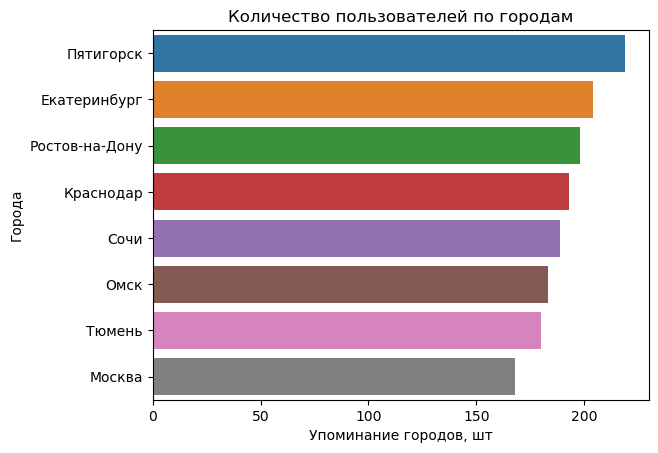

In [17]:
# создадим сводную таблицу из датафрейма с пользователями, где будут индексами  города,
# и будет столбец с количеством упоминаний этого города (количество пользователей)
df_count_city = pd.pivot_table(
    df_users, index="city", values="user_id", aggfunc="count"
)
# переименуем название столбца
df_count_city.columns = ["count_city"]
# отсортируем по убыванию и визуализируем
df_count_city = df_count_city.sort_values(by="count_city", ascending=False)
sbrn.ylabel = "Города"
ax = sbrn.barplot(y=df_count_city.index, x="count_city", data=df_count_city)
ax.set(
    xlabel="Упоминание городов, шт",
    ylabel="Города",
    title="Количество пользователей по городам",
)
# выведем численную информацию столбца 'count_city'
print("Числовая характеристика столбца с количеством упоминаний города:")
df_count_city["count_city"].describe()

В целом количество пользователей в разных городах не сильно отличается. Но, тем не менее, можно выделить города Пятигорск и Москва, которые имеют наибольшее и наименьшее количество упоминаний соответственно. Это выглядит странно, учитывая населения этих городов. Скорее всего это может быть вызвано отсутствием конкуренции в сфере проката самокатов в Пятигорске и наоборот, слишком большим выбором компаний, предлагающих такие услуги, в Москве. <br>
То, что медианное и среднее значение практически совпадают, наталкивает на мысль, что распределение количества пользователей по городам является нормальным распределением.

#### Cоотношение пользователей с подпиской и без подписки

Количество пользователей с подпиской Ultra: 699
Количество пользователей без подписки: 835
Распределение подписок по городам :
                free  ultra
city                       
Екатеринбург     112     92
Краснодар        112     81
Москва            84     84
Омск              92     91
Пятигорск        125     94
Ростов-на-Дону   109     89
Сочи             103     86
Тюмень            98     82


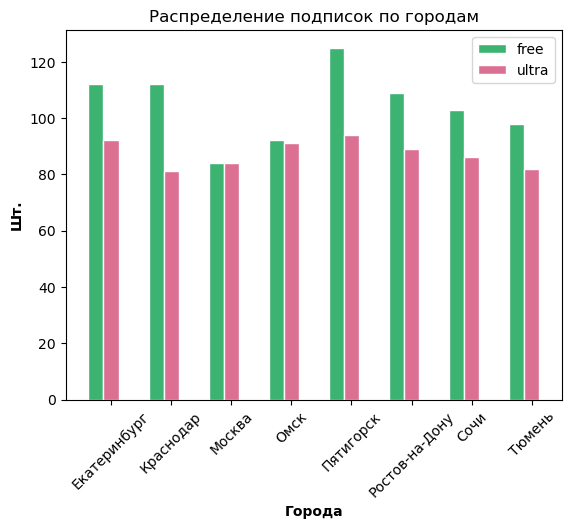

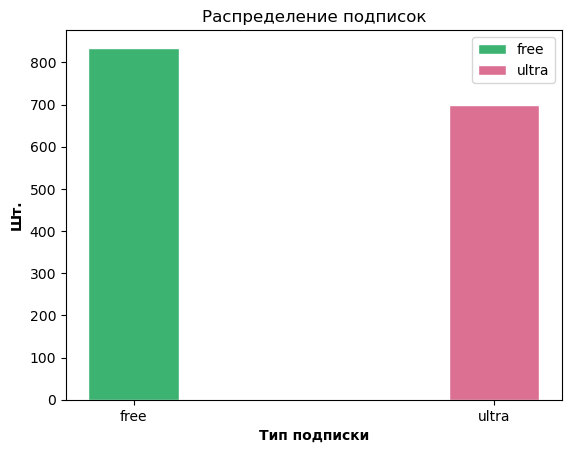

In [18]:
print(
    "Количество пользователей с подпиской Ultra:",
    df_users[df_users["subscription_type"] == "ultra"]["subscription_type"].count(),
)
print(
    "Количество пользователей без подписки:",
    df_users[df_users["subscription_type"] == "free"]["subscription_type"].count(),
)
print("Распределение подписок по городам :")
subscription_city = pd.pivot_table(
    df_users,
    columns="subscription_type",
    index="city",
    values="user_id",
    aggfunc="count",
)
subscription_city.columns = ["free", "ultra"]
print(subscription_city)

# отрисовка столбчатой диаграммы
barWidth = 0.25
r1 = np.arange(len(subscription_city["free"]))
r2 = [x + barWidth for x in r1]
plt.bar(
    r1,
    subscription_city["free"],
    color="#3cb371",
    width=barWidth,
    edgecolor="white",
    label="free",
)
plt.bar(
    r2,
    subscription_city["ultra"],
    color="#db7093",
    width=barWidth,
    edgecolor="white",
    label="ultra",
)
plt.xlabel("Города", fontweight="bold")
plt.ylabel("Шт.", fontweight="bold")
plt.title("Распределение подписок по городам")
plt.xticks(
    [r + barWidth for r in range(len(subscription_city.index))],
    subscription_city.index,
    rotation=45,
)
plt.legend()
plt.show()

plt.bar(
    "free",
    df_users[df_users["subscription_type"] == "free"]["subscription_type"].count(),
    color="#3cb371",
    width=barWidth,
    edgecolor="white",
    label="free",
)
plt.bar(
    "ultra",
    df_users[df_users["subscription_type"] == "ultra"]["subscription_type"].count(),
    color="#db7093",
    width=barWidth,
    edgecolor="white",
    label="ultra",
)
plt.title("Распределение подписок")
plt.xlabel("Тип подписки", fontweight="bold")
plt.ylabel("Шт.", fontweight="bold")
plt.legend()
plt.show()

И в совокупности и отдельно по городам наблюдается тренд, что большиство пользователей предпочитают не оформлять подписку Ultra. Только в Москве эти значения равны, а в Омске отличаются на одно значение.

####  Bозраст пользователей

Числовая характеристика колонки с возрастом пользователей:


count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

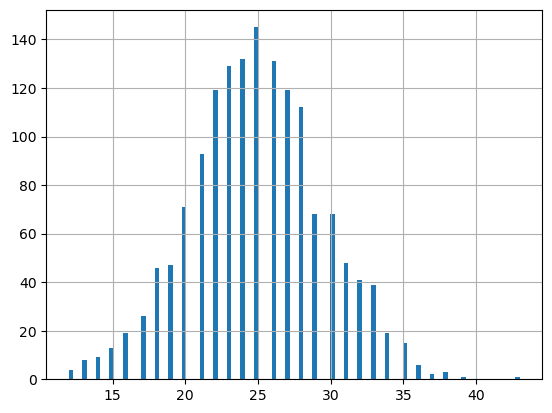

In [19]:
print("Числовая характеристика колонки с возрастом пользователей:")
display(df_users["age"].describe())
df_users["age"].hist(bins=100);

Возраст пользователей подчиняется нормальному распределению. Среднее значение и на гистограмме и в числовом описании колонки равно **25** годам. Можно так же проверить распределения возрастов по городам.

In [20]:
print("Распределение подписок по городам :")
age_city = pd.pivot_table(df_users, index="city", values="age", aggfunc="mean")
age_city

Распределение подписок по городам :


,age
city,
Екатеринбург,24.955882
Краснодар,25.290155
Москва,25.267857
Омск,25.382514
Пятигорск,24.716895
Ростов-на-Дону,24.545455
Сочи,24.507937
Тюмень,24.638889


Так же видим, что средний возраст пользователей каждого города практически равен общему среднему возрасту 25 годам.

####  Расстояние, которое пользователь преодолел за одну поездку

Числовое описание столбца с дистанцией:
 count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64


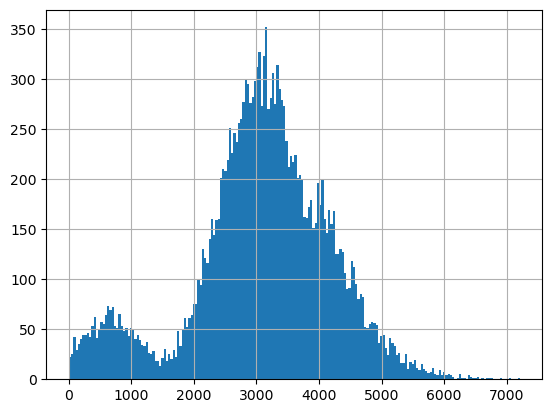

In [21]:
df_rides["distance"].hist(bins=200)
print("Числовое описание столбца с дистанцией:\n", df_rides["distance"].describe())

На гистограмме видим два отчетливых пика. Первый на отметке примерно **700** метров, второй - на отметке **3000** метров. Это говорит нам о том, что чаще всего берут самокаты на небольшие дистанции (до 1000 м) и дистанции посерьезнее - в районе 3000 метров.

#### Продолжительность поездок

Числовое описание столбца с дистанцией:
 count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64


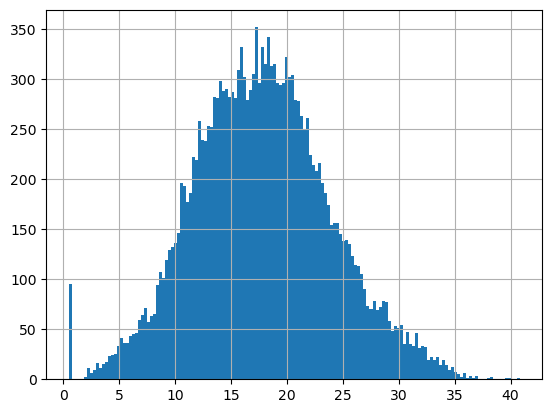

In [22]:
df_rides["duration"].hist(bins=150)
print("Числовое описание столбца с дистанцией:\n", df_rides["duration"].describe())

Оказывается есть небольшой всплеск в самом начале, который говорит о том что почти у 100 человек поездка длилась меньше минуты, быть может быстро поняли, что катание на самокате им не нравится, или садилась батарейка уже в этот момент, ну или какая другая причина.

Среднее время время поездок равно 17 минутам. Если вспомнить, что среднее расстояние, вычисленное в предыдущем пункте, равно 3000 метров, то средняя скорость получается в районе 11 км/ч, что выглядит вполне логично. 

#### Промежуточный итог.

1. Выяснили, что больше всего пользователей из Пятигорска, а меньше всего из Москвы. В среднем количество пользователей по городам не сильно отличается.
2. Количество пользователей без подписки больше, чем с подпиской (835 и 699 соответственно).
3. Средний возраст пользователей равен 25 годам, причем от города к городу этот параметр практически не меняется.
4. Самые популярные дистанции за одну поездку это 700 метров и 3000 метров, но, тем не менее, средняя дистанция равна 3000 метрам.
5. Среднее время равно 17 минутам. Из этого показателя и среднего расстояния посчитали среднюю скорость и получили 11 км/ч, что вполне выглядит логичным.

## Шаг 4. Объединение данных

#### Объединим данные о пользователях, поездках и подписках в один датафрейм. 

In [23]:
# датафрейм с таблицами пользователей и поездок
df = df_users.merge(df_rides, on="user_id", how="outer")
# на всякий случай проверим, вдруг в датафрейме были такие user_id которых нет в таблице с данными пользователей,
# проверим наличие пропусков, если во всех таблицах нули, то все user_id впорядке
# df.isna().sum()

# датафрейм со всеми данными
df = df.merge(df_subscriptions, on="subscription_type", how="outer")
df.sample(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
320,34,Федор,17,Краснодар,ultra,5027.834500,24.602695,2021-09-04,9,6,0,199
7136,744,Ксения,26,Екатеринбург,free,3532.934968,14.152927,2021-04-10,4,8,50,0
3141,339,Юлиана,24,Краснодар,ultra,3046.802750,11.309462,2021-06-26,6,6,0,199
4019,433,Мелания,20,Сочи,ultra,2594.466053,20.783398,2021-07-06,7,6,0,199
17382,1488,Рамиль,15,Екатеринбург,free,3486.116318,28.430582,2021-02-11,2,8,50,0
12333,1126,Владислав,26,Ростов-на-Дону,free,2472.735721,19.116005,2021-11-30,11,8,50,0
8113,819,Мария,28,Омск,free,2431.803064,13.582834,2021-03-22,3,8,50,0
5350,574,Жанна,34,Пятигорск,ultra,4198.428714,20.994762,2021-03-09,3,6,0,199
5396,577,Ариана,25,Пятигорск,ultra,3566.814915,19.926255,2021-08-16,8,6,0,199
2221,237,Виктория,19,Краснодар,ultra,2525.135363,19.912242,2021-10-15,10,6,0,199


#### Создадим два датафрейма

##### Датафрейм c данными о пользователях без подписки

In [24]:
subscription_free = df[df["subscription_type"] == "free"]
subscription_free.sample(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6744,716,Мелания,17,Москва,free,2291.649983,19.088176,2021-06-26,6,8,50,0
16611,1429,Анастасия,24,Тюмень,free,3248.180913,28.991604,2021-12-16,12,8,50,0
11255,1048,Павел,23,Краснодар,free,2739.239263,25.696196,2021-01-23,1,8,50,0
11814,1088,Самир,28,Тюмень,free,2999.118645,16.995593,2021-05-18,5,8,50,0
17282,1480,Кира,25,Краснодар,free,3308.489188,15.925468,2021-03-13,3,8,50,0
9386,915,Галина,24,Екатеринбург,free,3145.486278,24.795574,2021-01-10,1,8,50,0
8365,838,Владислав,23,Ростов-на-Дону,free,3060.510643,9.121021,2021-04-25,4,8,50,0
14100,1252,Нелли,31,Краснодар,free,3524.979584,20.134568,2021-05-07,5,8,50,0
13070,1180,Регина,26,Омск,free,5167.013981,27.316886,2021-08-15,8,8,50,0
7461,768,Эдуард,25,Ростов-на-Дону,free,1808.679210,11.167655,2021-12-27,12,8,50,0


##### Датафрейм c данными о пользователях c подпиской

In [25]:
subscription_ultra = df[df["subscription_type"] == "ultra"]
subscription_ultra.sample(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
665,74,Арсений,19,Тюмень,ultra,3318.663680,14.712931,2021-03-23,3,6,0,199
6394,687,Карина,26,Сочи,ultra,2898.532295,18.688921,2021-05-01,5,6,0,199
525,58,Ян,22,Пятигорск,ultra,886.860398,13.900415,2021-03-11,3,6,0,199
1522,164,Зарина,17,Сочи,ultra,3164.383570,29.986301,2021-04-26,4,6,0,199
925,99,Гордей,24,Москва,ultra,3032.950699,23.131803,2021-05-02,5,6,0,199
4852,523,Ян,23,Тюмень,ultra,3964.827283,17.343028,2021-05-22,5,6,0,199
647,70,Вера,32,Омск,ultra,3479.511091,26.912190,2021-08-28,8,6,0,199
2667,284,Софья,28,Краснодар,ultra,2992.866561,23.957199,2021-05-18,5,6,0,199
5608,598,Кира,21,Пятигорск,ultra,3348.753129,14.819129,2021-07-16,7,6,0,199
2898,309,Анастасия,23,Тюмень,ultra,3838.181112,24.352724,2021-06-22,6,6,0,199


##### Визуализация информации о расстоянии и времени поездок для пользователей без подписки и с подпиской.

Гистограмма для данных о дистанции для пользователей без подписки:


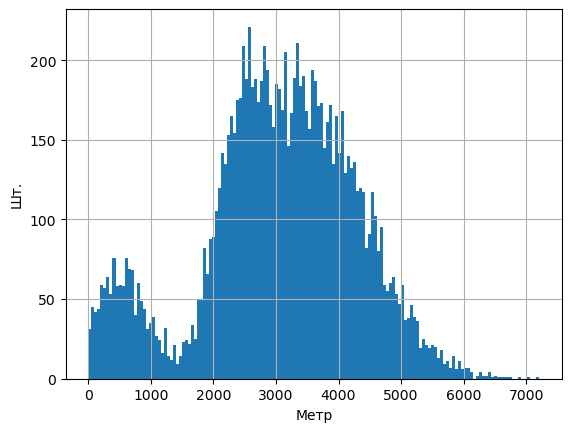

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64
Гистограмма для данных о длительности поездки для пользователей без подписки:


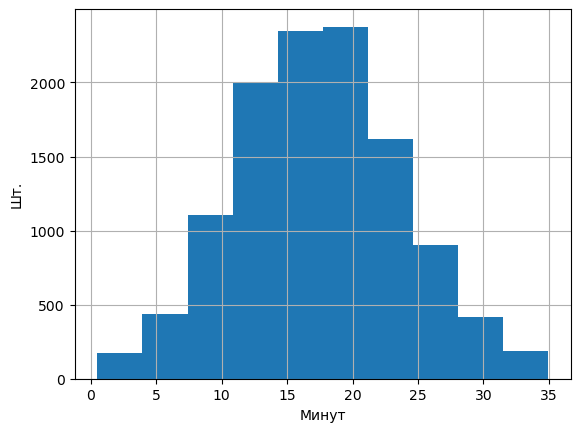

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64


In [26]:
print("Гистограмма для данных о дистанции для пользователей без подписки:")
subscription_free["distance"].hist(bins=150)
plt.xlabel("Метр")
plt.ylabel("Шт.")
plt.show()
print(subscription_free["distance"].describe())
print("Гистограмма для данных о длительности поездки для пользователей без подписки:")
subscription_free["duration"].hist()
plt.xlabel("Минут")
plt.ylabel("Шт.")
plt.show()
print(subscription_free["duration"].describe())

Гистограмма для данных о дистанции для пользователей c подпиской:


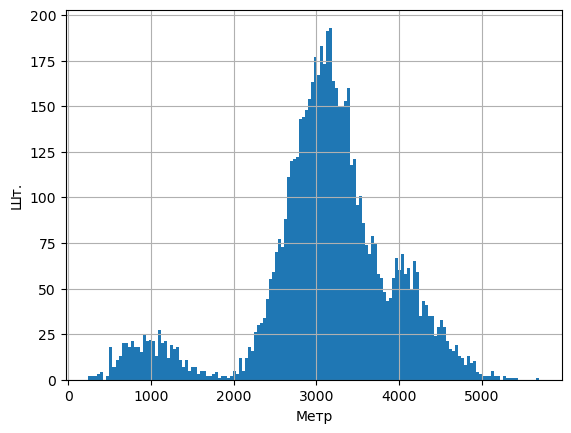

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64
Гистограмма для данных о длительности поездки для пользователей c подпиской:


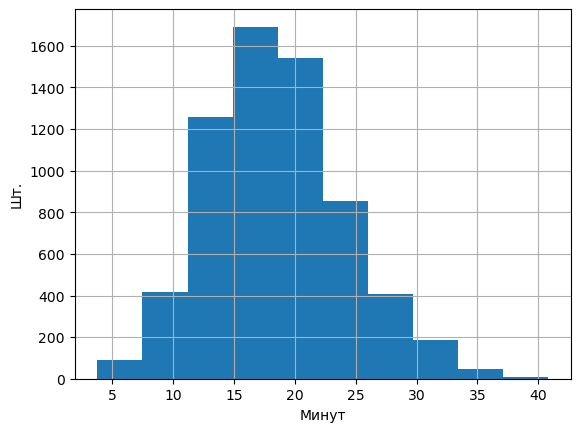

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64


In [27]:
print("Гистограмма для данных о дистанции для пользователей c подпиской:")
subscription_ultra["distance"].hist(bins=150)
plt.xlabel("Метр")
plt.ylabel("Шт.")
plt.show()
print(subscription_ultra["distance"].describe())
print("Гистограмма для данных о длительности поездки для пользователей c подпиской:")
subscription_ultra["duration"].hist()
plt.xlabel("Минут")
plt.ylabel("Шт.")
plt.show()
print(subscription_ultra["duration"].describe())

Объединим на графиках пользователей с платной и бесплатной подпиской, чтобы нагляднее сравнить их профили

Гистограмма для данных о дистанции для пользователей c подпиской и без:


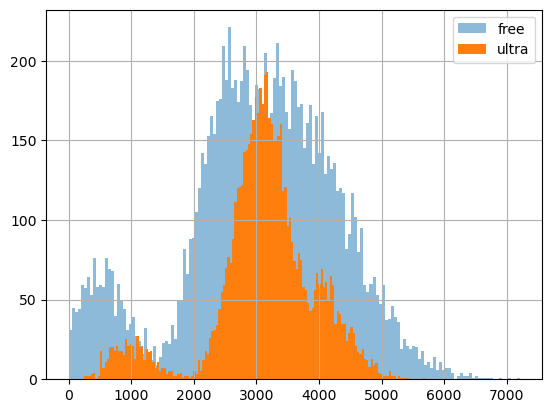

Гистограмма для данных о длительности поездки для пользователей c подпиской и без подписки:


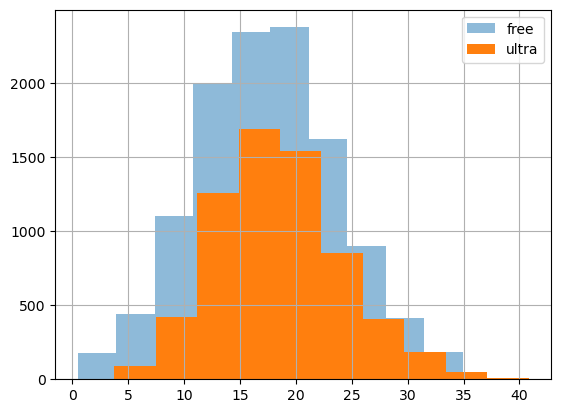

In [28]:
print("Гистограмма для данных о дистанции для пользователей c подпиской и без:")
ax = subscription_free["distance"].hist(alpha=0.5, bins=150, label="free")
ax = subscription_ultra["distance"].hist(bins=150, label="ultra")
plt.legend()
plt.show()

print(
    "Гистограмма для данных о длительности поездки для пользователей c подпиской и без подписки:"
)
ax = subscription_free["duration"].hist(alpha=0.5, label="free")
ax = subscription_ultra["duration"].hist(label="ultra")
plt.legend()
plt.show()

Видно, что профили пользователей обоих подписок довольно схожи.

#### Промежуточный итог.

1. Объедили все данные в одну таблицу ***df***.
2. Создали два датафрейма из ***df***:
   * 1 - это данные для пользователей без подписки ***subscription_free***, 
   * 2 - это данные для пользователей с подпиской ***subscription_ultra***.
3. Визулизировали данные длительности и дистанции поездок для категорий пользователей без подписки и с подпиской.<br>
    Можно заметить, что у обладателей подписки средняя длительность поездок примерно на 1 минуту больше и составляет около 18 минут. Все это выглядит логично, ведь у пользователей с подпиской минута движения дешевле, могут меньше спешить.<br>
    Также можно заметить, что хоть среднее проезжаемое расстояние примерно одинаково у обоих категорий пользователей, но у обладателей подписки есть отчетливый горб на графике на значении 4000 м, что говорит о том, что некоторая значимая часть пользователей с подпиской любят более длительные по дистанции поездки.

## Шаг 5. Подсчёт выручки

#### Создание и работа с датафреймом с агрегированными данными о поездках на основе датафрейма с объединёнными данными 

На всякий случай проверим за какой период у нас данные, и проверим, не поменялось ли состояние подписки у какого-нибудь пользоваетеля за этот период:

In [29]:
print(df["date"].min())
print(df["date"].min())
print(df["date"].max() - df["date"].min())

n = 0
for i in df["user_id"]:
    if len(df[df["user_id"] == i]["subscription_type"].value_counts()) > 1:
        print(df[df["user_id"] == i])
        n += 1
print(
    "Количество пользователей, которые в какой то месяц оформили подписку или наоборот отменили, равно:",
    n,
)

2021-01-01 00:00:00
2021-01-01 00:00:00
363 days 00:00:00
Количество пользователей, которые в какой то месяц оформили подписку или наоборот отменили, равно: 0


Все поездки совершены в течение 2021 года, ни у одного пользователя состояние подписки не поменялось за рассматриваемый период. Отлично!

Создадим датафрейм с суммарным расстоянем, количеством поездок и суммарным временем поездок для каждого пользователя за каждый месяц. Также, для удобства расчета выручки, добавим в датафрейм из таблицы ***df*** стоимость минуты для каждого пользователя, стоимость подписки и стоимость старта.

In [30]:
# суммарное расстояниеm
user_stat = pd.pivot_table(
    df, index=["user_id", "month"], values="distance", aggfunc="sum"
)

# количество поездок
user_stat = user_stat.merge(
    pd.pivot_table(df, index=["user_id", "month"], values="date", aggfunc="count"),
    how="outer",
    on=["user_id", "month"],
)
# суммарное время
user_stat = user_stat.merge(
    pd.pivot_table(df, index=["user_id", "month"], values="duration", aggfunc="sum"),
    how="outer",
    on=["user_id", "month"],
)
# переименуем колонки
user_stat.columns = ["sum_distance", "count_trip", "sum_duration"]

# можно еще добавить имя пользователя
# user_stat = user_stat.merge(df_users.loc[:][['user_id','name']].copy(), how='outer', on='user_id')
# поменяем местами колонки
# user_stat = user_stat[['user_id', 'name', 'sum_distance', 'count_trip', 'sum_duration']]

user_stat.head(20)

sum_distance  count_trip  sum_duration
user_id month                                        
1       1       7027.511294           2     41.416640
        4        754.159807           1      6.232113
        8       6723.470560           2     44.776802
        10      5809.911100           2     31.578017
        11      7003.499363           3     53.397424
        12      6751.629942           2     27.203912
2       3      10187.723006           3     60.959959
        4       6164.381824           2     39.048633
        6       3255.338202           1     13.851127
        7       6780.722964           2     46.170157
        8        923.007439           1      6.914760
        10      2824.636598           1     18.779128
        12      3828.248580           1     11.920514
3       1       3061.777147           1     12.654443
        2       5421.152016           2     37.568637
        4       2956.651632           1     20.671364
        5       9064.026918           3     61.404503
        7      10919.595403           3     65.519784
        9       2891.012822           1     22.390055
        12      2593.381928           1     12.984728

In [31]:
# добавим также стоимость старта, стоимость минуты, и стоимость подписки на месяц
user_stat = user_stat.merge(
    pd.pivot_table(
        df,
        index=["user_id", "month"],
        values=["minute_price", "subscription_fee", "start_ride_price"],
        aggfunc="mean",
    ),
    how="outer",
    on=["user_id", "month"],
)
user_stat.head(15)

sum_distance  count_trip  sum_duration  minute_price  \
user_id month                                                         
1       1       7027.511294           2     41.416640             6   
        4        754.159807           1      6.232113             6   
        8       6723.470560           2     44.776802             6   
        10      5809.911100           2     31.578017             6   
        11      7003.499363           3     53.397424             6   
        12      6751.629942           2     27.203912             6   
2       3      10187.723006           3     60.959959             6   
        4       6164.381824           2     39.048633             6   
        6       3255.338202           1     13.851127             6   
        7       6780.722964           2     46.170157             6   
        8        923.007439           1      6.914760             6   
        10      2824.636598           1     18.779128             6   
        12      3828.248580           1     11.920514             6   
3       1       3061.777147           1     12.654443             6   
        2       5421.152016           2     37.568637             6   

               start_ride_price  subscription_fee  
user_id month                                      
1       1                     0               199  
        4                     0               199  
        8                     0               199  
        10                    0               199  
        11                    0               199  
        12                    0               199  
2       3                     0               199  
        4                     0               199  
        6                     0               199  
        7                     0               199  
        8                     0               199  
        10                    0               199  
        12                    0               199  
3       1                     0               199  
        2                     0               199

#### В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь

In [32]:
user_stat["income"] = (
    user_stat["minute_price"] * round(user_stat["sum_duration"])
    + user_stat["start_ride_price"] * user_stat["count_trip"]
    + user_stat["subscription_fee"]
)
user_stat.sample(10)

,,sum_distance,count_trip,sum_duration,minute_price,start_ride_price,subscription_fee,income
user_id,month,,,,,,,
474,12,3137.305080,1,17.479870,6,0,199,301.0
1513,3,11344.620686,3,46.448689,8,50,0,518.0
1392,11,12617.170586,4,60.126252,8,50,0,680.0
1484,4,7217.721340,3,36.269997,8,50,0,438.0
1207,10,7124.003370,2,39.470577,8,50,0,412.0
1112,1,10189.905937,3,65.344699,8,50,0,670.0
316,1,4168.607888,2,26.169251,6,0,199,355.0
425,6,3857.328900,1,14.571987,6,0,199,289.0
631,1,3262.995639,1,23.236234,6,0,199,337.0


Все расчеты выполнены, все новые столбцы заполнены.

## Шаг 6. Проверка гипотез

#### Тратят ли пользователи с подпиской больше времени на поездки?

Так как генеральных совокупностей у нас две, то воспользуемся односторонней (правой) гипотезой о равенстве средних двух генеральных совокупностей.<br>
Нулевая гипотеза будет выглядеть слудующим образом: <br>
<b>H<sub>0</sub></b> - среднее время, которое тратят пользователи с подпиской (таблица *subscription_ultra*) равно среднему времени, которое тратят на поездку пользователи без подписки (таблица *subscription_free*).<br>
Альтернативная гипотеза: <br>
<b>H<sub>1</sub></b> - среднее время, которое тратят пользователи с подпиской, больше времени, которое тратят на поездку пользователи без подписки.

In [33]:
# уровень статистической значимости
alpha = 0.01

# правосторонняя гипотеза
results = st.ttest_ind(
    subscription_ultra["duration"], subscription_free["duration"], alternative="greater"
)

print("p-значение:", results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.2804098316645613e-34
Отвергаем нулевую гипотезу


Выяснили, что нулевая гипотеза неверна. Поэтому остается альтернативная гипотеза, что средняя продолжительность поездки подписчиков больше, чем среднее время поездки у пользователей без подписки. 

#### Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, меньше 3130 метров?

Так как генеральные совокупности у нас не большие, то можем для одной из них высчитать среднее значение и проверить одностороннюю гипотезу. <br>
Нулевая гипотеза будет выглядеть слудующим образом:<br>
<b>H<sub>0</sub></b> - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку равно 3130 метров.<br>
Альтернативная гипотеза:<br>
<b>H<sub>1</sub></b> - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку меньше 3130 метров.

In [34]:
# уровень статистической значимости
alpha = 0.01

# левосторонняя гипотеза
results = st.ttest_1samp(subscription_ultra["distance"], 3130, alternative="less")

print("p-значение:", results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.08046311521502145
Не получилось отвергнуть нулевую гипотезу


Отвергнуть нулевую гипотезу не удалось, значит весьма допустимо, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку равно 3130 метров.

#### Проверим гипотезу о том, будет ли выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки

Проверим, действительно ли пользователи с подпиской «выгоднее» для компании. Для этого придется сравнить среднюю выручку для каждого пользователя из двух категорий пользователей. Для этого создадим два небольших датафрейма (один для подписчиков, второй нет), в котором в качестве индексов будут *user_id*, а в качестве столбца - средние траты данного пользователя.

In [35]:
ultra_user_expense = pd.pivot_table(
    user_stat[user_stat["minute_price"] == 6],
    index="user_id",
    values="income",
    aggfunc="mean",
)
print("Таблица с выручкой от пользователей с подпиской:")
display(ultra_user_expense)
free_user_expense = pd.pivot_table(
    user_stat[user_stat["minute_price"] == 8],
    index="user_id",
    values="income",
    aggfunc="mean",
)
print("Таблица с выручкой от пользователей без подписки:")
display(free_user_expense)

Таблица с выручкой от пользователей с подпиской:


,income
user_id,
1,403.000000
2,368.714286
3,399.571429
4,488.000000
5,329.500000
...,...
695,333.400000
696,325.000000
697,367.000000


Таблица с выручкой от пользователей без подписки:


,income
user_id,
700,342.666667
701,301.090909
702,277.555556
703,244.400000
704,326.222222
...,...
1530,354.888889
1531,443.000000
1532,294.250000


Нулевая гипотеза будет выглядеть следующим образом:<br>
<b>H<sub>0</sub></b> - средняя выручка, которую получают с пользователя с подпиской (таблица *ultra_user_expense*) равно средней выручке, получаемой с пользователя без подписки (таблица *free_user_expense*).<br>
Альтернативная гипотеза:<br>
<b>H<sub>1</sub></b> - средняя выручка, которую получают с пользователя с подпиской, больше средней выручки, которую получают с пользователя без подписки.

In [36]:
# уровень статистической значимости
alpha = 0.01

# правосторонняя гипотеза
results = st.ttest_ind(
    ultra_user_expense["income"], free_user_expense["income"], alternative="greater"
)

print("p-значение:", results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.2017898192470927e-40
Отвергаем нулевую гипотезу


Нулевую гипотезу отвергли, а значит осталась альтернативная, которая утверждает, что средняя выручка, которую получают с пользователя с подпиской, больше средней выручки, которую получают с пользователя без подписки.

#### "Какой тест вам понадобился бы для проверки этой гипотезы?"

1. Сформулировали бы гипотезу о равенстве средних для зависимых выборок, т.е сравнили поменялось ли количество обращений в техподдержку с помощью метода ***scipy.stats.ttest_rel(before_update, after_update)***. <br>
<b>H<sub>0</sub></b> - количество обращений осталось прежним,<br>
<b>H<sub>1</sub></b> - количество обращений изменилось, в какую сторону мы не знаем.<br>
2. Если гипотезу не удалось опровергнуть, то дело закрыто, обновление сервера не повлияло на количество обращений.
3. Если гипотезу удалось опровергнуть, то надо сравнить "классическим" методом среднее количество обращений до и после проведения работ на сервере. Если среднее увеличилось, то обновление только навредило, а если уменьшилось, то обновление оказалось успешным.

## Шаг 7. Распределения

#### Акция с раздачей промокодов на один бесплатный месяц

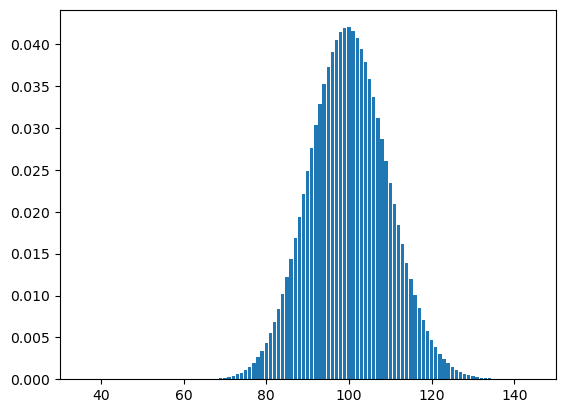

In [37]:
# по условию, это получается биноминальное распределение
p = 0.1  # какова вероятность продления подписки
n = 1000  # скольким людям планируем раздать промокод, чтобы получить 100 подписок зная вероятность p

# список distr, в котором будете хранить значения распределения
distr = []
for k in range(0, n + 1):
    choose = factorial(n) / (factorial(k) * factorial(n - k))
    prob = choose * p**k * (1 - p) ** (n - k)
    distr.append(prob)

plt.xlim([30, 150])
plt.bar(range(0, n + 1), distr);

Если отправить промокод 1000 пользователям, то то, что продлят подписку 100 клиентов, наиболее вероятный результат. Однако слишком велика вероятность, что успехов будет меньше. На гистограмме видно, что в диапазоне от 70 до 99 успехов примерно половина всего распределения. Риск слишком велик.

Проверим можно ли аппроксимировать биноминальное распределение нормальным:

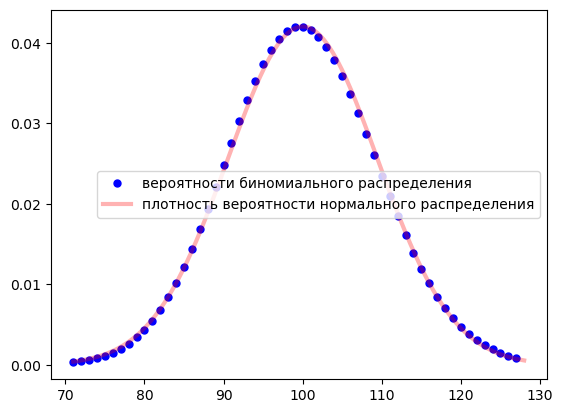

Условие выполняется


In [38]:
# зададим функцию, которая выдаёт <num> чисел,
# равномерно распределённых от <start> до <stop>
# (понадобится для визуализации нормального распределения)
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result


# задаём параметры биномиального распределения
n = 1000
p = 0.1

# границы промежутка, в котором будем строить аппроксимацию -
# от n*p минус 3 ст.отклонения бином.распределения
# до n*p плюс 3 ст.отклонения бином.распределения
# (там, где вероятности значений почти не равны нулю)
left = int(n * p - 3 * sqrt(n * p * (1 - p)))
right = int(n * p + 3 * sqrt(n * p * (1 - p)))

# зададим набор значений биномиальной величины на выбранном промежутке:
# все неотрицательные целые числа от left до right
x = list(range(max(0, left), right))

# рисуем график биномиального распределения
ax = plt.subplot()
# используем синие о-образные маркеры и размер маркера 5
ax.plot(
    x, binom.pmf(x, n, p), "bo", ms=5, label="вероятности биномиального распределения"
)

# зададим параметры нормального распределения равными
# мат.ожиданию и дисперсии биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

# рисуем график нормального распределения:
# получим список из 100 чисел от left до right
x = linspace(left, right, 100)
# используем красную линию ширины 3 и прозрачности 0.3
ax.plot(
    x,
    norm.pdf(x, mu, sigma),
    "r-",
    lw=3,
    alpha=0.3,
    label="плотность вероятности нормального распределения",
)


# настраиваем оптимальное расположение легенды и выводим график
ax.legend(loc="best")
plt.show()

# выводим, выполняется ли наше условие аппроксимации:
# лежит ли mu ± 3 sigma в промежутке от 0 до n:
if (mu - (3 * sigma) >= 0) and ((mu + (3 * sigma) <= n)):
    print("Условие выполняется")
else:
    print("Условие не выполняется")

Условие выполняется, значит можем аппроксимировать биноминальное распределение нормальным.

In [39]:
# задаём параметры биномиального распределения
n = 1168
p = 0.1

# задаём нормальное распределение с математическим ожиданием n*p
# и стандартным отклонением sqrt(n * p * (1 - p))
distr = st.norm(n * p, sqrt(n * p * (1 - p)))

# значение, для которого хотим найти вероятность
x = 100

# считаем вероятность получить значение, равное x или меньше
result = distr.cdf(x)

print(result)

0.050650790692463


Получили, что для получения 100 новых подписчиков во время проведения акции с вероятностью невыполнения плана 5%, зная вероятность продления пользователем подписки 10%, необходимо отправить промокод **1168** людям. 

#### push-уведомления в мобильном приложении

Практически все аналогично предыдущему пункту, только уже точно знаем по условию, что можем аппроксимировать.

0.15371708296369768


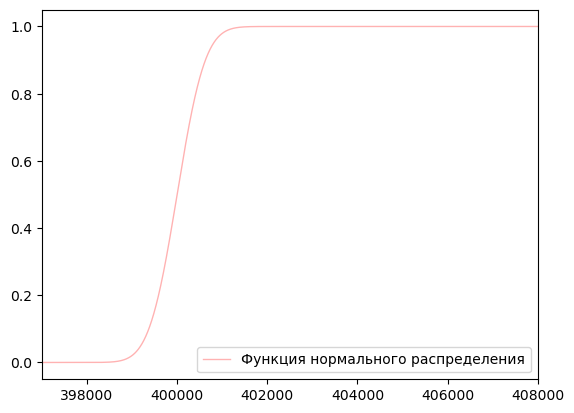

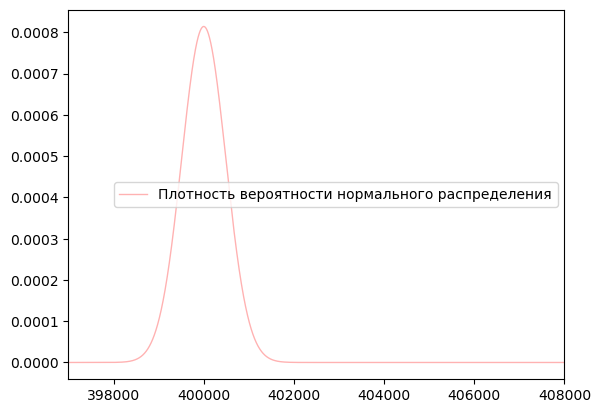

In [40]:
# по условию, это получается биноминальное распределение
p = 0.4  # какова вероятность открыть уведомление
n = 1000000  # скольким людям планируется отправить


# задаём нормальное распределение с математическим ожиданием n*p
# и стандартным отклонением sqrt(n * p * (1 - p))
distr = st.norm(n * p, sqrt(n * p * (1 - p)))

# значение, для которого хотим найти вероятность
a = 399500

# рисуем график нормального распределения:
# получим список из 100 чисел от 0 до 1000000
x = linspace(0, n, 1000000)
# считаем вероятность получить значение, равное a или меньше
result = distr.cdf(a)
print(result)

# построим график функции нормального распределения
ax = plt.subplot()
ax.plot(
    x,
    norm.cdf(x, n * p, sqrt(n * p * (1 - p))),
    "r-",
    lw=1,
    alpha=0.3,
    label="Функция нормального распределения",
)
ax.legend(loc="best")
plt.xlim([397000, 408000])
plt.show()

# построим график плотности вероятности  нормального распределения
ax = plt.subplot()
ax.plot(
    x,
    norm.pdf(x, n * p, sqrt(n * p * (1 - p))),
    "r-",
    lw=1,
    alpha=0.3,
    label="Плотность вероятности нормального распределения",
)
ax.legend(loc="best")
plt.xlim([397000, 408000])
plt.show()

Аппроксимировали биноминальное распределение с вероятностью успеха p=0.4 и количеством экспериментов n=1 млн. в нормальное. Построили графики плотности вероятности и функции распределения для этого нормального распределения. Видим, что очень маленькое стандартное отклонение так как очень большая выборка. Выяснили, что вероятность того, что уведомление откроют не более 399,5 тыс. пользователей равно **15 %** .

## Вывод

1. Ознакомились с данными и избавились от дубликатов в таблице с пользователями.
2. Определили, что больше всего пользователей сервисом в Пятигорске, а меньше всего в Москве (219 и 168 соответственно). 
3. Средний возраст пользователей везде примерно равен 25 годам.
4. Подписчиков меньше, чем пользователей без подписки (699 и 835 соответственно).
5. Средняя дистанция одной поездки в районе 3000 м, а средняя продолжительность чуть больше 17 минут. Так же в началах графиков продолжительности поездок и дистанции увидели всплески, говорящие нам о том, что многие пользователи предпочитают еще и короткие поезди дистанцией до 1 км и продолжительностью до 1 минуты.
6. Проверили гипотезы и получили следующие итоги: 
* средняя продолжительность поездки подписчиков больше, чем среднее время поездки у пользователей без подписки
* высока вероятность того, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку равно 3130 метров
* средняя выручка, которую получают с пользователя с подпиской, больше средней выручки, которую получают c пользователя без подписки.
7. Дополнительно прописали алгоритм действий для проверки гипотезы о том, что количество обращений в тех поддержку снизится после обновления сервера.
8. Выяснили, что для получения 100 новых подписчиков во время проведения акции с вероятностью невыполнения плана 5%, зная вероятность продления пользователем подписки 10%, необходимо отправить промокод **1168** людям. 
9. Выяснили, что вероятность того, что при отправке 1 млн. уведомлений их откроют не более 399,5 тыс. пользователей равно 15 %.